In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier ,BaggingClassifier,AdaBoostClassifier, StackingClassifier ,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from mlxtend.feature_selection import SequentialFeatureSelector

In [668]:
df = pd.read_csv("upi_fraud_dataset.csv")

In [815]:
df.sample(5)

,trans_hour,trans_day,trans_month,category,upi_number,age,trans_amount,state,zip,fraud_risk
566,22,21,1,11,6900000120,22,1122.38,35,45150,1
2307,11,24,3,3,7662000726,33,35.49,19,1843,0
1762,22,3,6,5,7662000181,31,20.63,24,64114,1
2392,17,27,3,11,7662000811,61,850.83,2,72059,1
2430,4,29,3,4,7662000849,70,37.74,16,66070,0


In [816]:
df["category"].value_counts()

category
4     462
11    426
12    261
2     243
8     232
6     157
7     155
10    132
5     121
1     113
0     110
9     109
3      81
13     64
Name: count, dtype: int64

In [670]:
df.shape

(2666, 12)

In [671]:
df.isna().sum()

Id              0
trans_hour      0
trans_day       0
trans_month     0
trans_year      0
category        0
upi_number      0
age             0
trans_amount    0
state           0
zip             0
fraud_risk      0
dtype: int64

In [672]:
df.duplicated().sum()

0

In [673]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2666 non-null   int64  
 1   trans_hour    2666 non-null   int64  
 2   trans_day     2666 non-null   int64  
 3   trans_month   2666 non-null   int64  
 4   trans_year    2666 non-null   int64  
 5   category      2666 non-null   int64  
 6   upi_number    2666 non-null   int64  
 7   age           2666 non-null   int64  
 8   trans_amount  2666 non-null   float64
 9   state         2666 non-null   int64  
 10  zip           2666 non-null   int64  
 11  fraud_risk    2666 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 250.1 KB


In [674]:
df.describe()

,Id,trans_hour,trans_day,trans_month,trans_year,category,upi_number,age,trans_amount,state,zip,fraud_risk
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.0,2666.000000,2.666000e+03,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,1332.501500,13.383721,13.552138,3.868717,2022.0,6.800075,8.030152e+09,46.098275,329.844299,27.153788,48219.701800,0.591898
std,769.753574,8.669769,10.316915,3.198150,0.0,3.826561,1.012387e+09,18.863370,385.964247,14.084107,26617.172444,0.491574
min,0.000000,0.000000,1.000000,1.000000,2022.0,0.000000,6.900000e+09,14.000000,1.020000,0.000000,1330.000000,0.000000
25%,666.250000,3.000000,3.000000,2.000000,2022.0,4.000000,7.086000e+09,31.000000,20.987500,15.000000,25132.750000,0.000000
50%,1332.500000,15.000000,15.000000,3.000000,2022.0,7.000000,7.662001e+09,45.000000,113.255000,29.000000,48088.000000,1.000000
75%,1998.750000,22.000000,23.000000,5.000000,2022.0,11.000000,8.876000e+09,58.000000,715.187500,38.000000,68881.000000,1.000000
max,2665.000000,23.000000,31.000000,12.000000,2022.0,13.000000,9.957000e+09,94.000000,3413.050000,50.000000,99783.000000,1.000000


In [675]:
df.columns

Index(['Id', 'trans_hour', 'trans_day', 'trans_month', 'trans_year',
       'category', 'upi_number', 'age', 'trans_amount', 'state', 'zip',
       'fraud_risk'],
      dtype='object')

In [676]:
# Id feature is unusable then delete this

df.drop(columns = ["Id"],inplace = True)

In [677]:
df.head()

,trans_hour,trans_day,trans_month,trans_year,category,upi_number,age,trans_amount,state,zip,fraud_risk
0,0,1,1,2022,12,9957000001,54,66.21,22,49879,0
1,1,1,1,2022,3,9957000002,15,55.81,14,62668,0
2,3,1,1,2022,8,9957000003,60,8.68,4,96037,0
3,6,1,1,2022,4,9957000004,44,89.52,40,29911,0
4,6,1,1,2022,0,9957000005,72,1.90,38,16421,0


In [678]:
# trans_year feature drop because it have similar data in each rows

df["trans_year"].value_counts()

trans_year
2022    2666
Name: count, dtype: int64

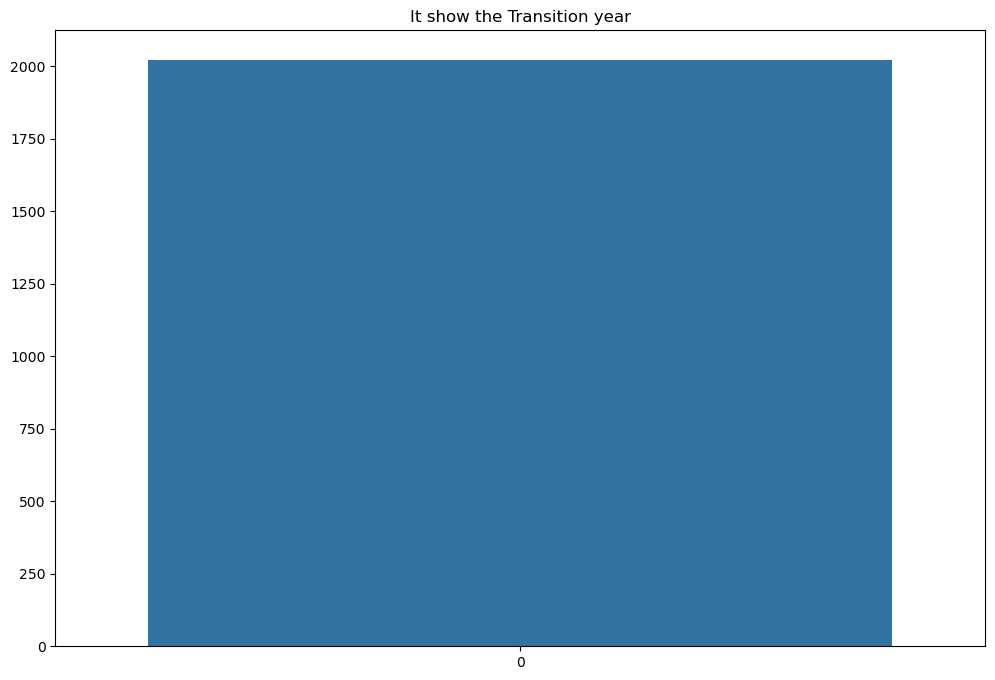

In [679]:
plt.figure(figsize = (12,8))
sns.barplot(df["trans_year"])
plt.title("It show the Transition year")
plt.show()

In [680]:
# trans_year feature drop because it have similar data in each rows

df.drop(columns = ["trans_year"],inplace = True)

In [681]:
df.sample(5)

,trans_hour,trans_day,trans_month,category,upi_number,age,trans_amount,state,zip,fraud_risk
586,8,22,1,2,6900000140,40,61.91,1,35776,0
1190,23,13,2,11,9678000165,17,1292.21,23,55606,1
93,22,1,5,12,9957000094,79,830.72,0,99783,1
693,3,28,1,4,6900000247,26,321.49,4,92267,1
2228,7,22,3,2,7662000647,48,65.39,1,36749,0


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


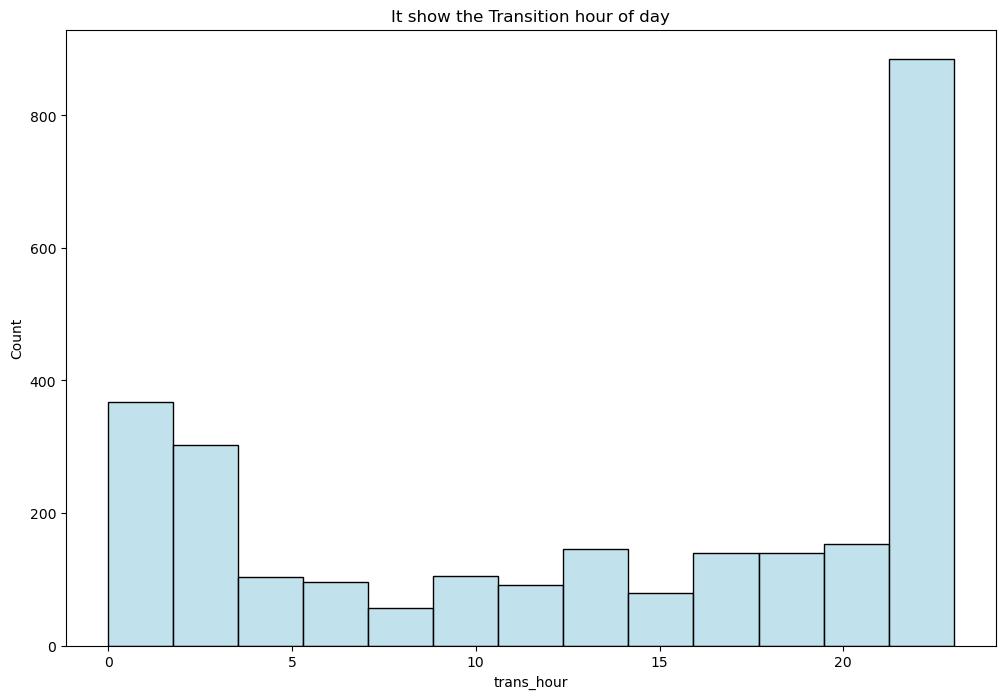

In [682]:
plt.figure(figsize = (12,8))
sns.histplot(df["trans_hour"],color = "lightblue")
plt.title("It show the Transition hour of day")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


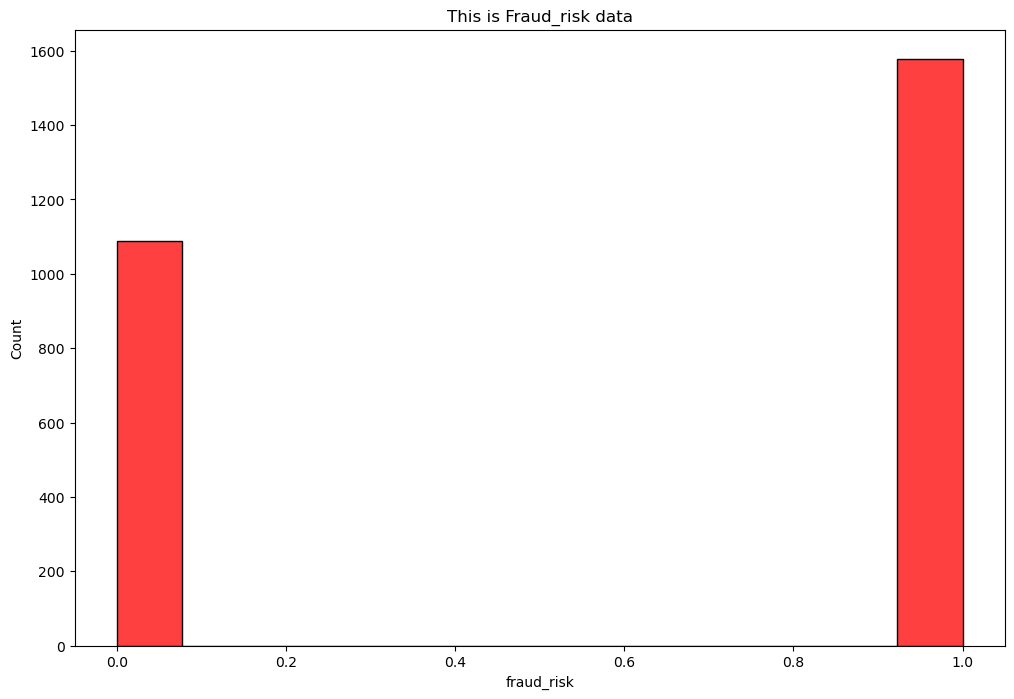

In [683]:
plt.figure(figsize = (12,8))
sns.histplot(df["fraud_risk"],color = "r")
plt.title("This is Fraud_risk data")
plt.show()

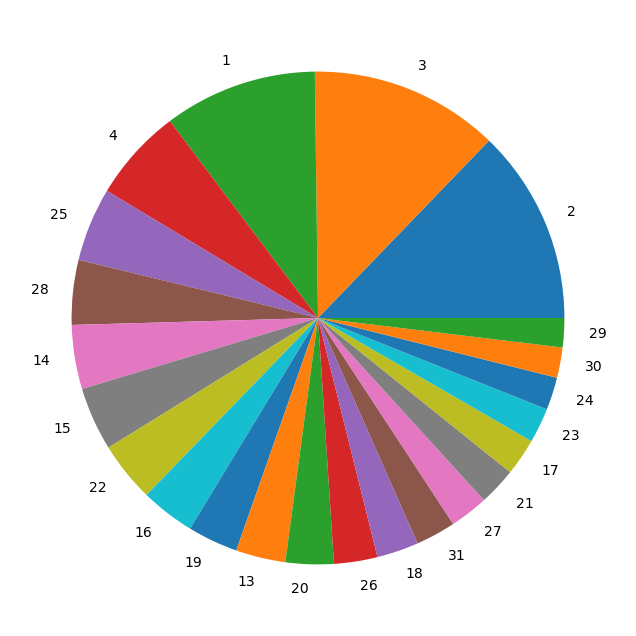

In [684]:
# This graph show the maximum time transition timing is 1 to 3

plt.figure(figsize = (12,8))
plt.pie(df["trans_day"].value_counts(),labels = df["trans_day"].value_counts().index)
plt.show()

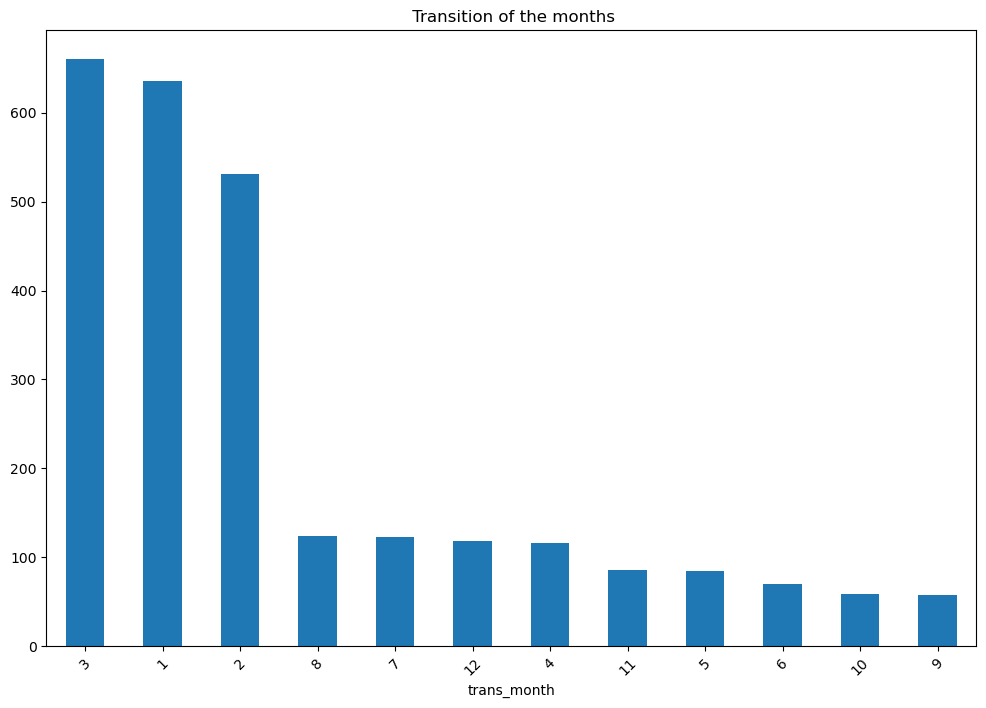

In [685]:
plt.figure(figsize = (12,8))
plt.title(" Transition of the months")
df["trans_month"].value_counts().plot(kind = "bar")
plt.xticks(rotation = 45)
plt.show()

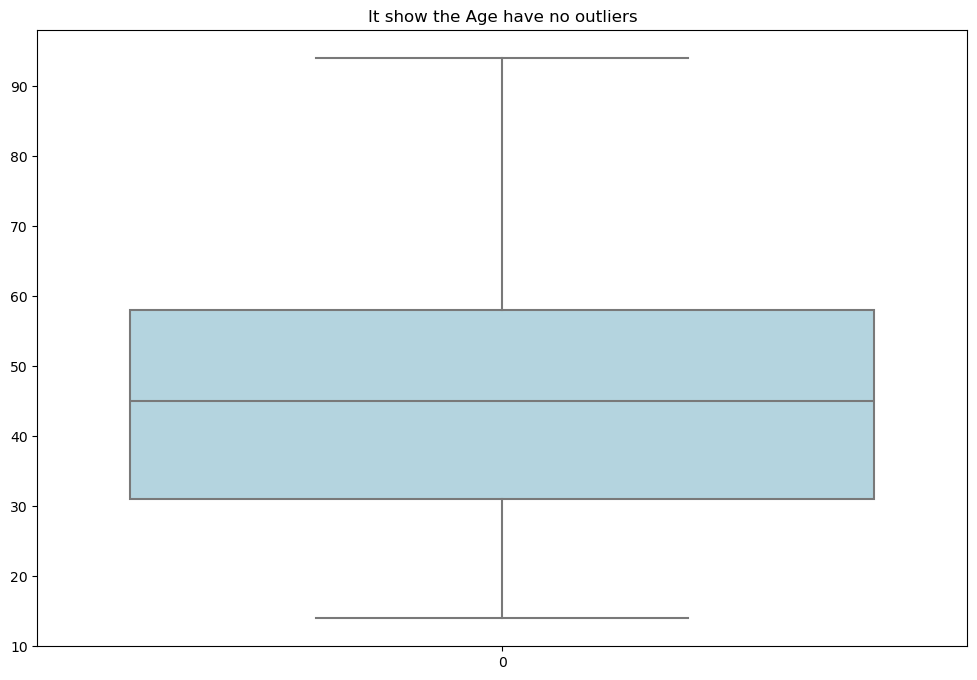

In [686]:
plt.figure(figsize = (12,8))
plt.title("It show the Age have no outliers")
sns.boxplot(df["age"],color = "lightblue")
plt.show()

In [687]:
df.sample(5)

,trans_hour,trans_day,trans_month,category,upi_number,age,trans_amount,state,zip,fraud_risk
1296,18,18,2,10,9101000039,38,80.14,50,82227,0
1341,22,19,2,9,9101000084,54,7.59,42,38079,1
2488,17,31,3,11,7662000907,21,1170.83,10,31632,1
772,14,30,1,6,7086000001,32,282.39,7,20036,1
1463,4,25,2,0,7005000016,58,6.88,9,33417,0


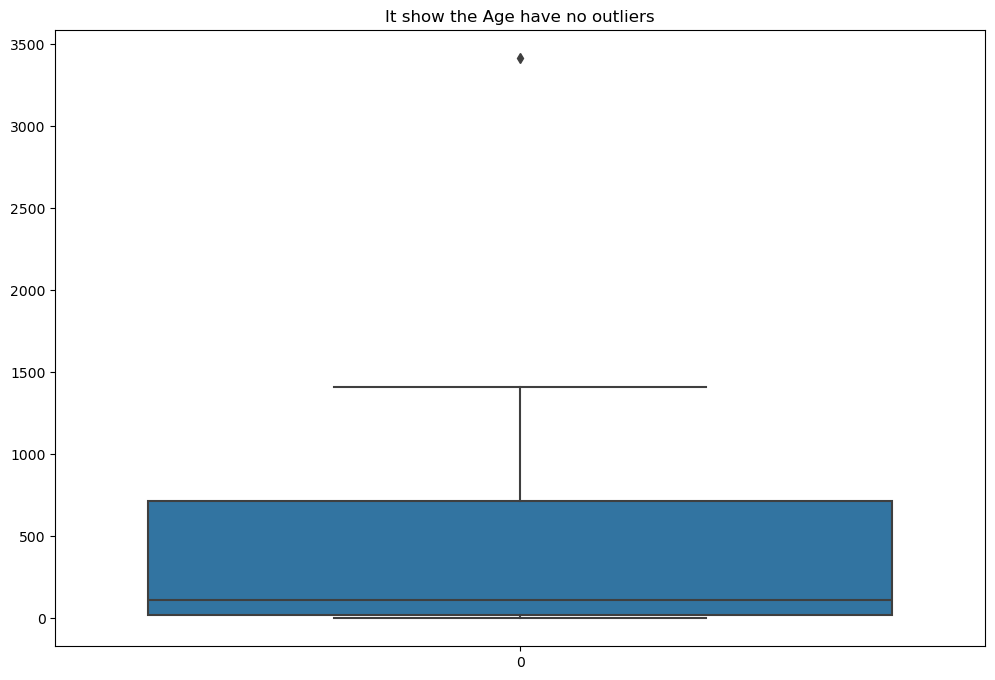

In [688]:
plt.figure(figsize = (12,8))
plt.title("It show the Age have no outliers")
sns.boxplot(df["trans_amount"])
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


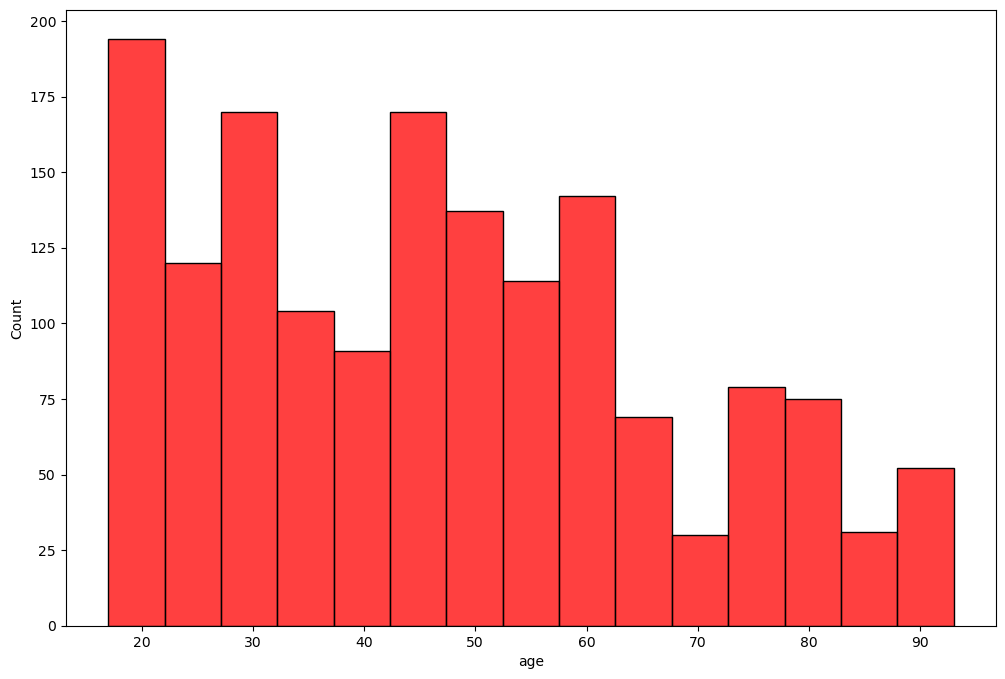

In [689]:
# This show 20, 30, 45 yr people making more fraud

plt.figure(figsize = (12,8))
sns.histplot(df[df["fraud_risk"] == 1]["age"],color = "red")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


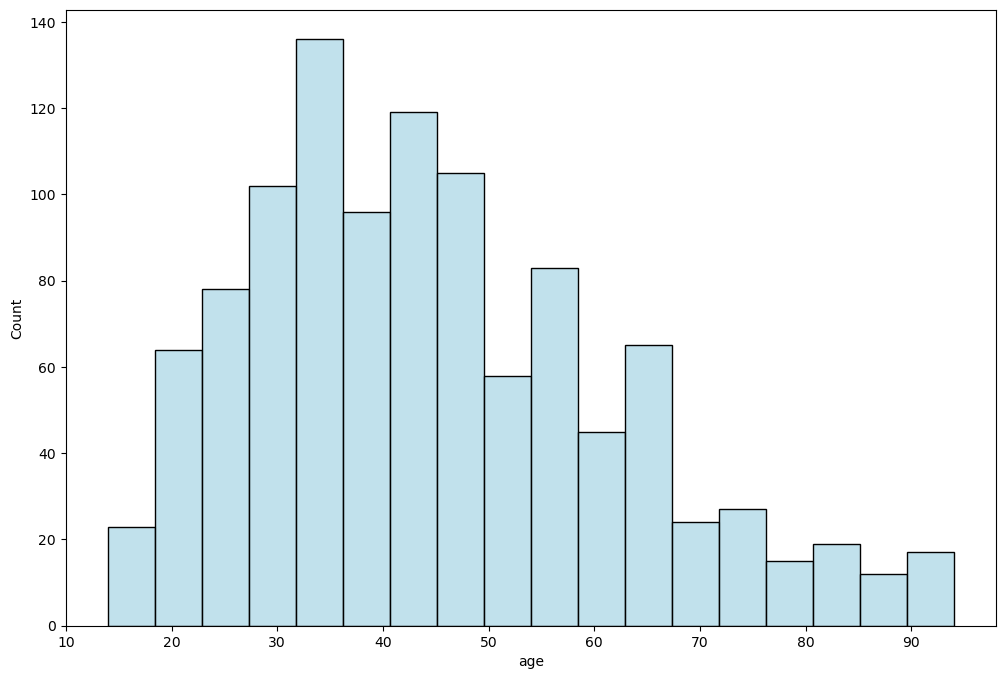

In [690]:
# This show 31 to 35 yr people making more no fraud

plt.figure(figsize = (12,8))
sns.histplot(df[df["fraud_risk"] == 0]["age"],color = "lightblue")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


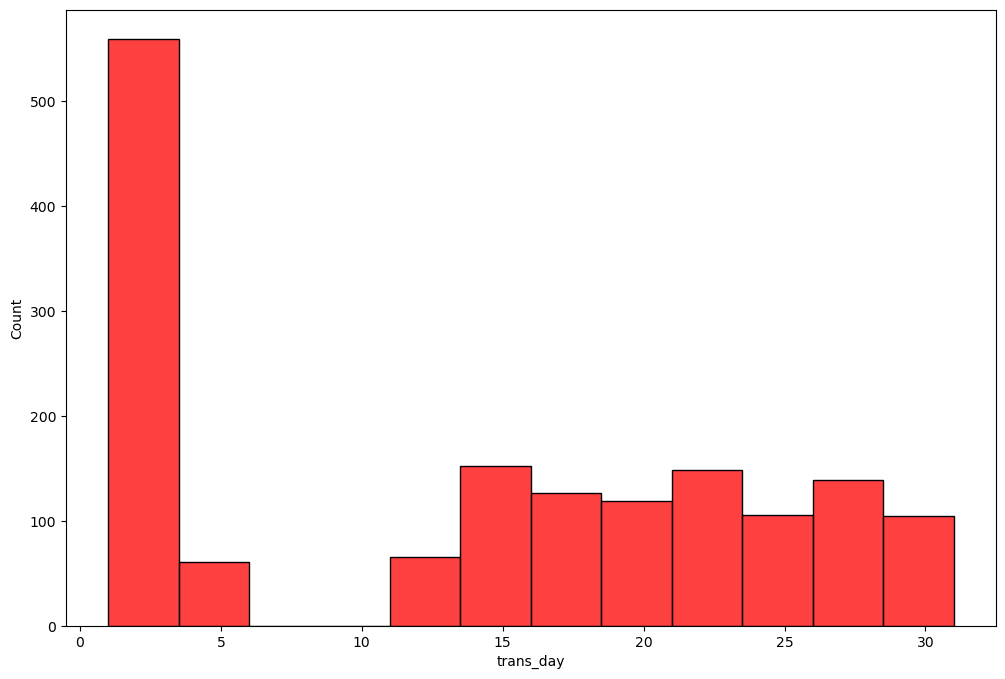

In [691]:
# This show 1 to 3 day of strating of months more people making fraud

plt.figure(figsize = (12,8))
sns.histplot(df[df["fraud_risk"] == 1]["trans_day"],color = "red")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


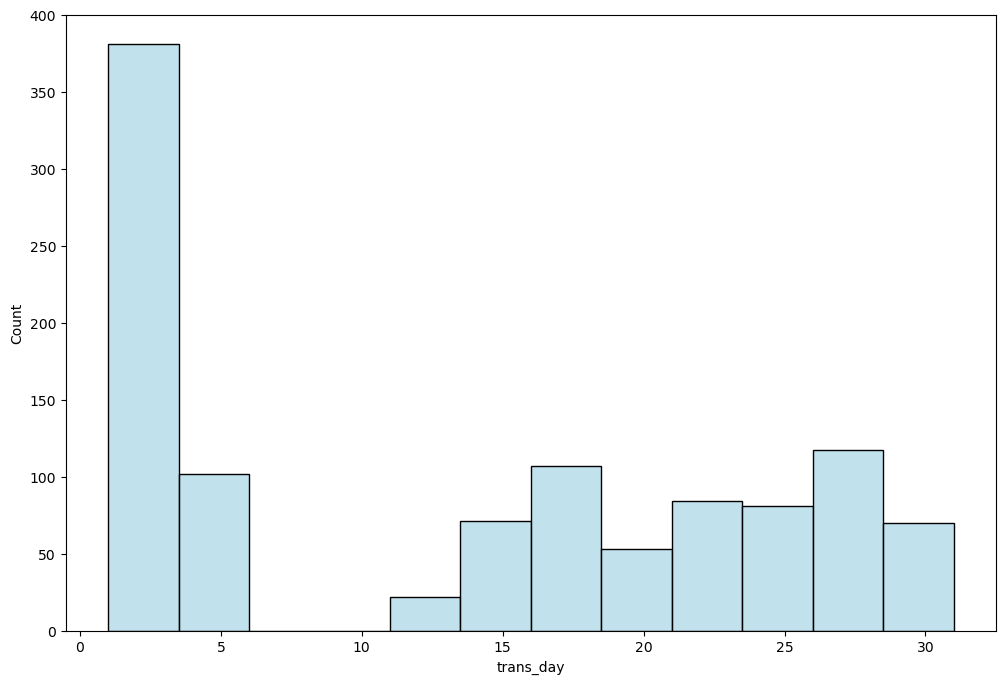

In [692]:
# This show 1 to 3 day of strating of months more people making no fraud

plt.figure(figsize = (12,8))
sns.histplot(df[df["fraud_risk"] == 0]["trans_day"],color = "lightblue")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


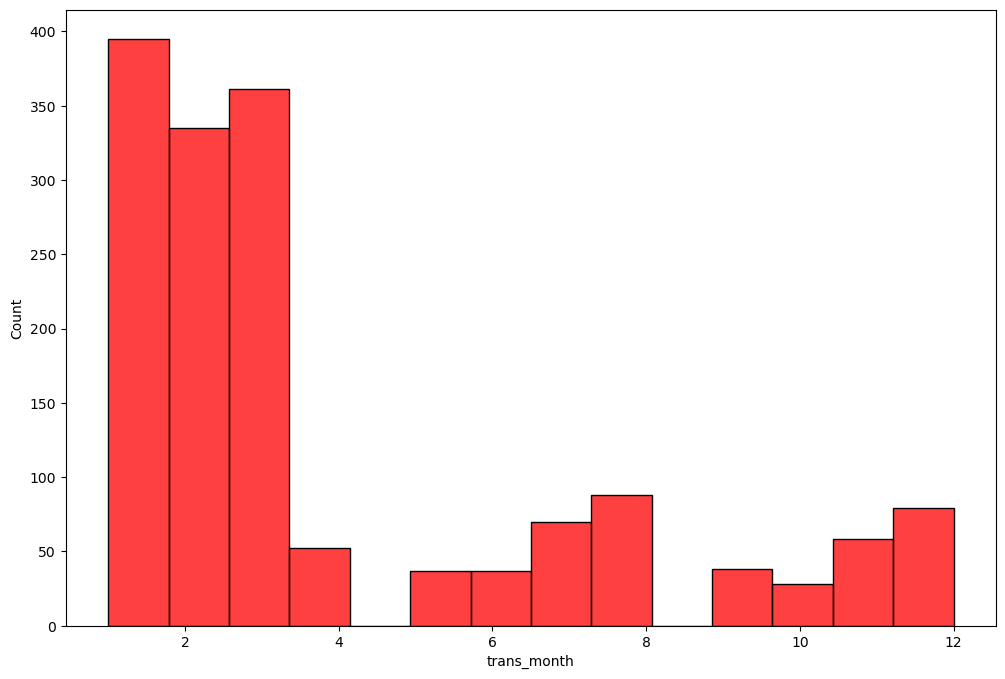

In [693]:
# This show 1 to 3 months of strating of months more people making fraud

plt.figure(figsize = (12,8))
sns.histplot(df[df["fraud_risk"] == 1]["trans_month"],color = "red")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


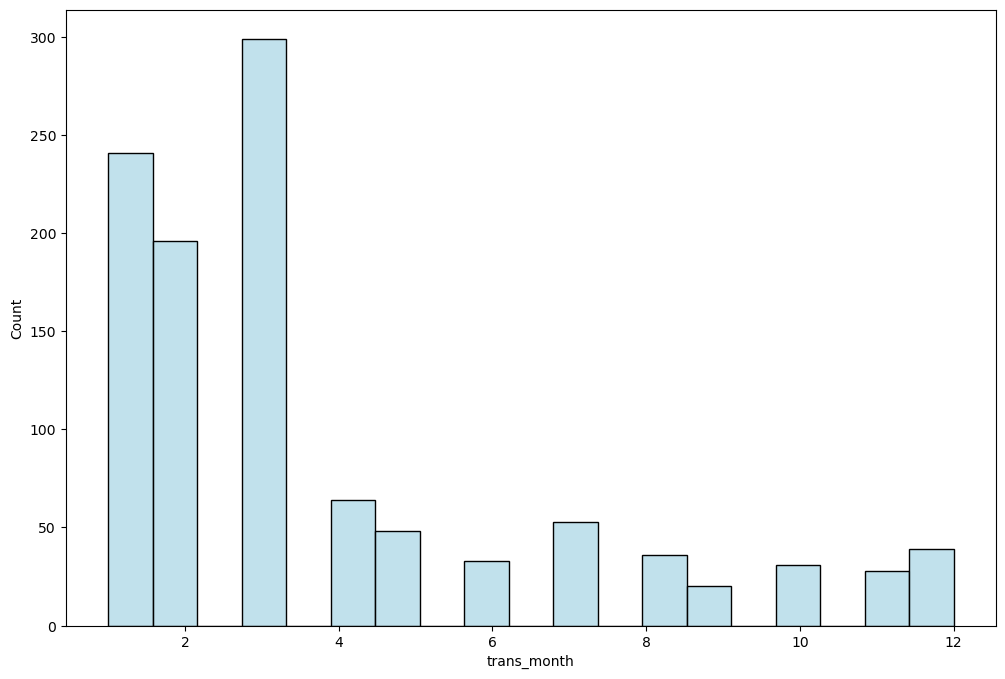

In [694]:
# In 3 to 4 months of strating of months more people making no fraud

plt.figure(figsize = (12,8))
sns.histplot(df[df["fraud_risk"] == 0]["trans_month"],color = "lightblue")
plt.show()

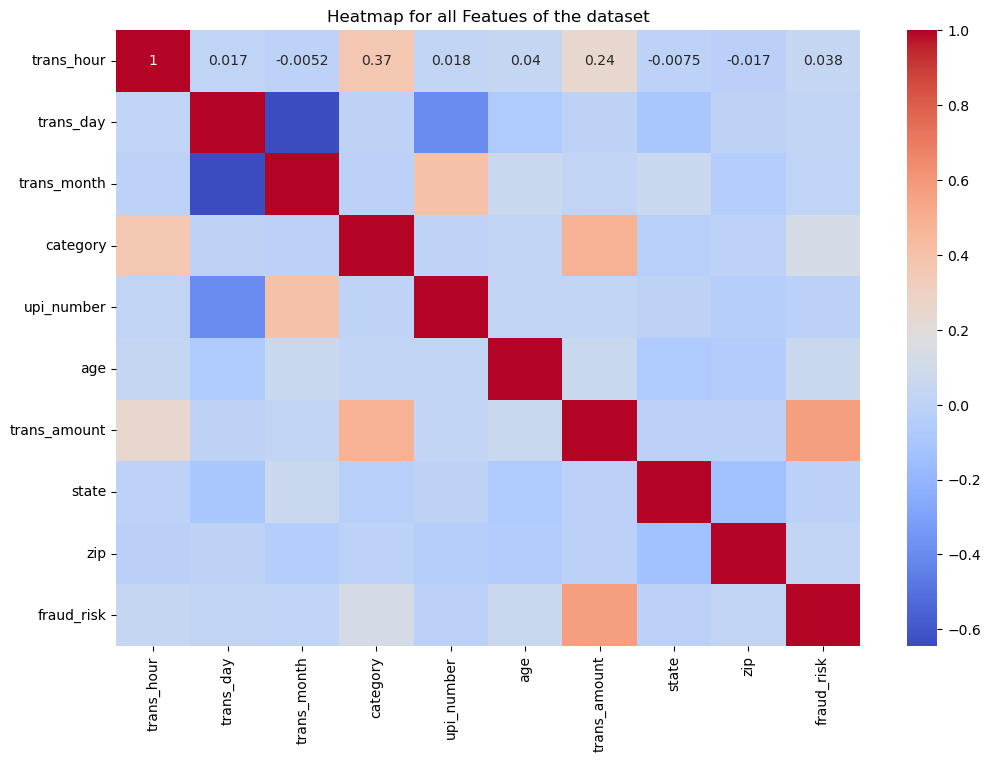

In [695]:
plt.figure(figsize = (12,8))
plt.title("Heatmap for all Featues of the dataset")
sns.heatmap(df.corr(),annot=True,cmap = "coolwarm")
plt.show()

In [696]:
df.head()

,trans_hour,trans_day,trans_month,category,upi_number,age,trans_amount,state,zip,fraud_risk
0,0,1,1,12,9957000001,54,66.21,22,49879,0
1,1,1,1,3,9957000002,15,55.81,14,62668,0
2,3,1,1,8,9957000003,60,8.68,4,96037,0
3,6,1,1,4,9957000004,44,89.52,40,29911,0
4,6,1,1,0,9957000005,72,1.90,38,16421,0


In [697]:
from sklearn.model_selection import train_test_split

In [698]:
x = df.drop(columns = "fraud_risk")
y = df["fraud_risk"]

In [699]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [700]:
lr = LogisticRegression()

In [701]:
#x_train = x_train[['trans_hour', 'trans_day', 'category', 'trans_amount']]
#x_test = x_test[['trans_hour', 'trans_day', 'category', 'trans_amount']]

In [702]:
lr.fit(x_train,y_train)

LogisticRegression()

In [703]:
y_pred_train = lr.predict(x_train)
y_pred = lr.predict(x_test)

In [704]:
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy score = ",accuracy_score(y_test,y_pred))

Accuracy_score train = 0.5928705440900562
Accuracy score =  0.5880149812734082


In [705]:
dt = DecisionTreeClassifier()

In [706]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [707]:
y_pred_train = dt.predict(x_train)
y_pred_test= dt.predict(x_test)
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score train = 1.0
Accuracy_score =  0.9363295880149812


In [708]:
rd = RandomForestClassifier()

In [709]:
rd.fit(x_train,y_train)

RandomForestClassifier()

In [710]:
y_pred_train = rd.predict(x_train)
y_pred_test = rd.predict(x_test)

In [711]:
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score train = 1.0
Accuracy_score =  0.9550561797752809


In [712]:
svc = SVC()

In [713]:
svc.fit(x_train,y_train)

SVC()

In [714]:
y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)

In [715]:
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score train = 0.5928705440900562
Accuracy_score =  0.5880149812734082


In [716]:
gnb = GaussianNB()

In [717]:
gnb.fit(x_train,y_train)

GaussianNB()

In [718]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

In [719]:
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score train = 0.5928705440900562
Accuracy_score =  0.5880149812734082


In [720]:
mnb = MultinomialNB()

In [721]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [722]:
y_pred_train = mnb.predict(x_train)
y_pred_test = mnb.predict(x_test)

In [723]:
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score train = 0.6904315196998124
Accuracy_score =  0.6872659176029963


In [724]:
knn = KNeighborsClassifier(n_neighbors=2)

In [725]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [726]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [727]:
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score train = 0.9727954971857411
Accuracy_score =  0.8745318352059925


In [728]:
xgb = XGBClassifier()

In [729]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [730]:
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

In [731]:
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score train = 1.0
Accuracy_score =  0.9775280898876404


In [732]:
sele = SequentialFeatureSelector(estimator = xgb,k_features=7,forward = False,verbose = 1,n_jobs=-1,scoring="accuracy")

In [733]:
sele.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    2.1s finished
Features: 8/7[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.5s finished
Features: 7/7

SequentialFeatureSelector(estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...),
                          forward=False, k_features=(7, 7), n_jobs=-1,
                          scoring='accuracy', verbose=1)

In [734]:
list(sele.k_feature_names_)

['trans_hour',
 'trans_day',
 'trans_month',
 'category',
 'upi_number',
 'trans_amount',
 'zip']

In [774]:
x_train = x_train[['trans_hour','trans_day','trans_month','category','upi_number','trans_amount']]
x_test = x_test[['trans_hour','trans_day','trans_month','category','upi_number','trans_amount']]

In [775]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [776]:
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

In [777]:
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score train = 1.0
Accuracy_score =  0.9588014981273408


In [778]:
cat = CatBoostClassifier()

In [779]:
cat.fit(x_train,y_train)

Learning rate set to 0.014234
0:	learn: 0.6732698	total: 4.54ms	remaining: 4.54s
1:	learn: 0.6524485	total: 8.5ms	remaining: 4.24s
2:	learn: 0.6354988	total: 12.5ms	remaining: 4.15s
3:	learn: 0.6168215	total: 16.7ms	remaining: 4.16s
4:	learn: 0.5963239	total: 21.5ms	remaining: 4.27s
5:	learn: 0.5809780	total: 25.6ms	remaining: 4.25s
6:	learn: 0.5657084	total: 30ms	remaining: 4.25s
7:	learn: 0.5532366	total: 34.2ms	remaining: 4.24s
8:	learn: 0.5390752	total: 44.2ms	remaining: 4.86s
9:	learn: 0.5239362	total: 49.7ms	remaining: 4.92s
10:	learn: 0.5102176	total: 56.6ms	remaining: 5.09s
11:	learn: 0.4987733	total: 61.1ms	remaining: 5.03s
12:	learn: 0.4872441	total: 71.6ms	remaining: 5.43s
13:	learn: 0.4790097	total: 80.8ms	remaining: 5.69s
14:	learn: 0.4683025	total: 86.5ms	remaining: 5.68s
15:	learn: 0.4562992	total: 103ms	remaining: 6.33s
16:	learn: 0.4440824	total: 108ms	remaining: 6.23s
17:	learn: 0.4374603	total: 114ms	remaining: 6.19s
18:	learn: 0.4275920	total: 119ms	remaining: 6.13s

In [780]:
y_pred_train = cat.predict(x_train)
y_pred_test = cat.predict(x_test)

In [781]:
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score train = 0.9962476547842402
Accuracy_score =  0.9606741573033708


In [782]:
lgbm = LGBMClassifier()

In [783]:
lgbm.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 1264, number of negative: 868
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 585
[LightGBM] [Info] Number of data points in the train set: 2132, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.592871 -> initscore=0.375845
[LightGBM] [Info] Start training from score 0.375845


LGBMClassifier()

In [784]:
y_pred_train = lgbm.predict(x_train)
y_pred_test = lgbm.predict(x_test)

In [785]:
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score train = 1.0
Accuracy_score =  0.9606741573033708


In [786]:
bag = BaggingClassifier(estimator = xgb)

In [787]:
bag.fit(x_train,y_train)

BaggingClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...))

In [788]:
y_pred_train = bag.predict(x_train)
y_pred_test = bag.predict(x_test)

In [789]:
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score train = 0.9943714821763602
Accuracy_score =  0.9625468164794008


In [790]:
ada = AdaBoostClassifier(estimator=rd)

In [791]:
ada.fit(x_train,y_train)

AdaBoostClassifier(estimator=RandomForestClassifier())

In [792]:
y_pred_train = ada.predict(x_train)
y_pred_test = ada.predict(x_test)

In [793]:
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score train = 1.0
Accuracy_score =  0.949438202247191


In [794]:
grb = GradientBoostingClassifier()

In [795]:
grb.fit(x_train,y_train)

GradientBoostingClassifier()

In [796]:
y_pred_train = grb.predict(x_train)
y_pred_test = grb.predict(x_test)

In [797]:
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score train = 0.9788930581613509
Accuracy_score =  0.9569288389513109


In [798]:
stack = StackingClassifier(estimators=[("grb",grb),("ada",ada),("rd",rd)],final_estimator=xgb)

In [799]:
stack.fit(x_train,y_train)

StackingClassifier(estimators=[('grb', GradientBoostingClassifier()),
                               ('ada',
                                AdaBoostClassifier(estimator=RandomForestClassifier())),
                               ('rd', RandomForestClassifier())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_stopping_rounds=None,
                                                 enable...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [800]:
y_pred_train = stack.predict(x_train)
y_pred_test = stack.predict(x_test)

In [801]:
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score train = 0.9817073170731707
Accuracy_score =  0.9606741573033708


In [802]:
estimators = [("grb",grb),("rd",rd),("dt",dt),("lr",lr),("gnb",gnb),("svc",svc),("knn",knn),("ada",ada),("xgb",xgb),("cat",cat),
                                ("lgbm",lgbm),("mnb",mnb)]

In [803]:
vot = VotingClassifier(estimators = estimators)

In [804]:
vot.fit(x_train,y_train)

Learning rate set to 0.014234
0:	learn: 0.6732698	total: 5.28ms	remaining: 5.27s
1:	learn: 0.6524485	total: 9.03ms	remaining: 4.51s
2:	learn: 0.6354988	total: 12.3ms	remaining: 4.09s
3:	learn: 0.6168215	total: 16.6ms	remaining: 4.12s
4:	learn: 0.5963239	total: 20.1ms	remaining: 4.01s
5:	learn: 0.5809780	total: 23.5ms	remaining: 3.89s
6:	learn: 0.5657084	total: 26.7ms	remaining: 3.79s
7:	learn: 0.5532366	total: 30.7ms	remaining: 3.81s
8:	learn: 0.5390752	total: 34.2ms	remaining: 3.76s
9:	learn: 0.5239362	total: 37.5ms	remaining: 3.71s
10:	learn: 0.5102176	total: 40.8ms	remaining: 3.67s
11:	learn: 0.4987733	total: 44.5ms	remaining: 3.67s
12:	learn: 0.4872441	total: 48.3ms	remaining: 3.66s
13:	learn: 0.4790097	total: 51.5ms	remaining: 3.63s
14:	learn: 0.4683025	total: 54.8ms	remaining: 3.6s
15:	learn: 0.4562992	total: 58.2ms	remaining: 3.58s
16:	learn: 0.4440824	total: 61.8ms	remaining: 3.57s
17:	learn: 0.4374603	total: 65ms	remaining: 3.54s
18:	learn: 0.4275920	total: 68.1ms	remaining: 3

VotingClassifier(estimators=[('grb', GradientBoostingClassifier()),
                             ('rd', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('lr', LogisticRegression()),
                             ('gnb', GaussianNB()), ('svc', SVC()),
                             ('knn', KNeighborsClassifier(n_neighbors=2)),
                             ('ada',
                              AdaBoostClassifier(estimator=RandomForestClassifier())),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x000001F539A68950>),
                             ('lgbm', LGBMClassifier()),
                             ('mnb', MultinomialNB())])

In [805]:
y_pred_train = vot.predict(x_train)
y_pred_test = vot.predict(x_test)

In [806]:
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score train = 1.0
Accuracy_score =  0.9662921348314607


In [807]:
stack = StackingClassifier(estimators = estimators,final_estimator=xgb)

In [808]:
stack.fit(x_train,y_train)

Learning rate set to 0.014234
0:	learn: 0.6732698	total: 4.24ms	remaining: 4.23s
1:	learn: 0.6524485	total: 7.69ms	remaining: 3.84s
2:	learn: 0.6354988	total: 11.9ms	remaining: 3.96s
3:	learn: 0.6168215	total: 15.4ms	remaining: 3.83s
4:	learn: 0.5963239	total: 18.8ms	remaining: 3.74s
5:	learn: 0.5809780	total: 22.2ms	remaining: 3.67s
6:	learn: 0.5657084	total: 25.9ms	remaining: 3.67s
7:	learn: 0.5532366	total: 29.5ms	remaining: 3.66s
8:	learn: 0.5390752	total: 32.8ms	remaining: 3.61s
9:	learn: 0.5239362	total: 36.1ms	remaining: 3.57s
10:	learn: 0.5102176	total: 40ms	remaining: 3.6s
11:	learn: 0.4987733	total: 44ms	remaining: 3.62s
12:	learn: 0.4872441	total: 48.3ms	remaining: 3.67s
13:	learn: 0.4790097	total: 51.8ms	remaining: 3.65s
14:	learn: 0.4683025	total: 55.5ms	remaining: 3.65s
15:	learn: 0.4562992	total: 59.2ms	remaining: 3.64s
16:	learn: 0.4440824	total: 62.5ms	remaining: 3.62s
17:	learn: 0.4374603	total: 65.7ms	remaining: 3.58s
18:	learn: 0.4275920	total: 68.9ms	remaining: 3.5

StackingClassifier(estimators=[('grb', GradientBoostingClassifier()),
                               ('rd', RandomForestClassifier()),
                               ('dt', DecisionTreeClassifier()),
                               ('lr', LogisticRegression()),
                               ('gnb', GaussianNB()), ('svc', SVC()),
                               ('knn', KNeighborsClassifier(n_neighbors=2)),
                               ('ada',
                                AdaBoostClassifier(estimator=RandomForestClassifier())),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=Non...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [809]:
y_pred_train = stack.predict(x_train)
y_pred_test = stack.predict(x_test)

In [810]:
print("Accuracy_score train =",accuracy_score(y_train,y_pred_train))
print("Accuracy_score = ",accuracy_score(y_test,y_pred_test))

Accuracy_score train = 0.9774859287054409
Accuracy_score =  0.9569288389513109


In [813]:
import pickle
with open("grb_upi.pkl", "wb") as f:
    pickle.dump(grb, f)

In [814]:
x_train.columns

Index(['trans_hour', 'trans_day', 'trans_month', 'category', 'upi_number',
       'trans_amount'],
      dtype='object')